In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc

In [4]:
df = pd.read_csv("online_shoppers_intention (1).csv")

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df['Weekend'] = np.where(df['Weekend'] == True, 1, 0)
df['Revenue'] = np.where(df['Revenue'] == True, 1, 0)

In [7]:
cat_col = [col for col in df.columns if df[col].dtypes == 'object']
cat_col

['Month', 'VisitorType']

In [8]:
for col in cat_col:
    le = LabelEncoder()
    df.loc[:, col] = le.fit_transform(df[col])

In [9]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [10]:
num_col = [col for col in df.columns if df[col].dtypes in ['int64', 'float64'] and col not in ['Revenue']]
num_col

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates in %',
 'ExitRates in %',
 'PageValues',
 'SpecialDay (probability)',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

In [11]:
for col in num_col:
    scaler = StandardScaler()
    df.loc[:, col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

In [61]:
y = np.unique(df['Revenue'])
classes = [0, 1]

class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y)

In [12]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [66]:
lr = LogisticRegression(class_weight=class_weights)

In [67]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:329: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced":


In [68]:
roc_auc_score = roc_auc_score(y_pred, y_test)
cr = classification_report(y_pred, y_test)
cm = confusion_matrix(y_pred, y_test)

In [69]:
print(roc_auc_score)

0.8137384092749979


In [70]:
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2285
           1       0.37      0.72      0.49       181

    accuracy                           0.89      2466
   macro avg       0.67      0.81      0.72      2466
weighted avg       0.93      0.89      0.91      2466



In [71]:
print(cm)

[[2065  220]
 [  50  131]]


[0.         0.02364066 1.        ] [0.         0.37321937 1.        ]


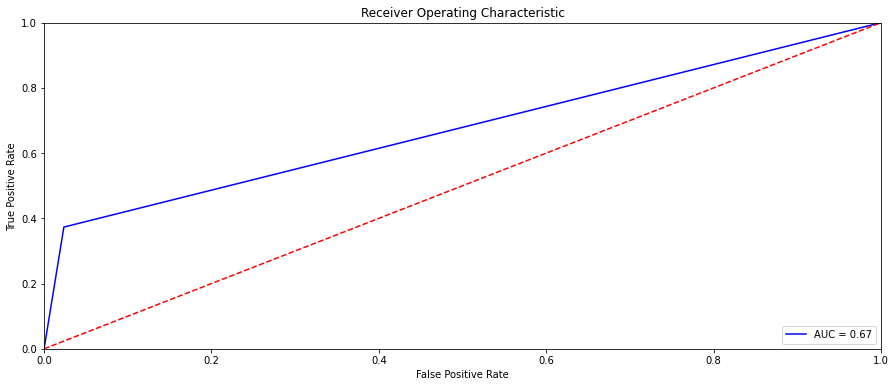

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [73]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0694 ± 0.0056,PageValues
0.0041 ± 0.0047,ExitRates in %
0.0015 ± 0.0022,VisitorType
0.0010 ± 0.0017,OperatingSystems
0.0009 ± 0.0003,Region
0.0009 ± 0.0003,BounceRates in %
0.0009 ± 0.0017,SpecialDay (probability)
0.0007 ± 0.0003,Administrative_Duration
0.0007 ± 0.0027,Month
0.0004 ± 0.0018,ProductRelated_Duration


In [74]:
dtc = DecisionTreeClassifier()

In [117]:
feature_names = X.columns.tolist()
feature_names

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates in %',
 'ExitRates in %',
 'PageValues',
 'SpecialDay (probability)',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [75]:
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [76]:
roc_auc_score = roc_auc_score(y_pred, y_test)

TypeError: 'numpy.float64' object is not callable

In [77]:
cr = classification_report(y_pred, y_test)
cm = confusion_matrix(y_pred, y_test)

In [78]:
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2089
           1       0.52      0.49      0.50       377

    accuracy                           0.85      2466
   macro avg       0.71      0.70      0.71      2466
weighted avg       0.85      0.85      0.85      2466



In [79]:
print(cm)

[[1921  168]
 [ 194  183]]


[0.         0.09172577 1.        ] [0.         0.52136752 1.        ]


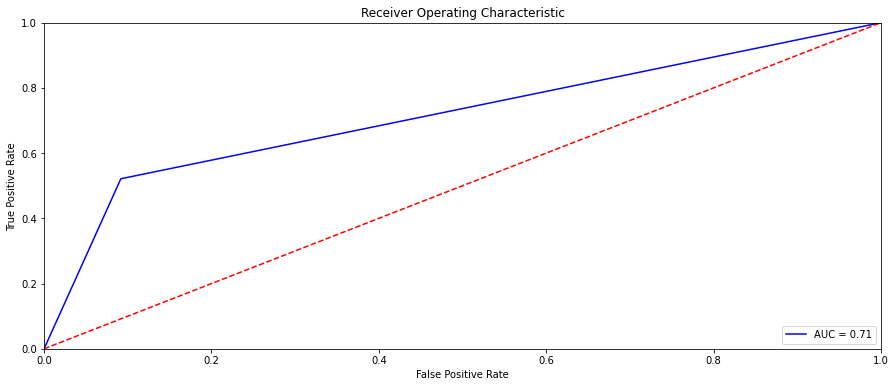

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
perm = PermutationImportance(dtc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1007 ± 0.0077,PageValues
0.0132 ± 0.0044,Administrative
0.0099 ± 0.0048,ExitRates in %
0.0090 ± 0.0071,BounceRates in %
0.0060 ± 0.0080,ProductRelated
0.0037 ± 0.0052,ProductRelated_Duration
0.0029 ± 0.0016,Informational
0.0005 ± 0.0093,Administrative_Duration
0.0005 ± 0.0008,Weekend
0.0003 ± 0.0030,Informational_Duration


In [91]:
import shap
import lime
from lime import lime_tabular

In [92]:
explainer = shap.Explainer(lr, X_train)
shap_values = explainer(X_test)

In [14]:
X_train.values

array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.51418219,
         2.        ,  0.        ],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.51418219,
         2.        ,  0.        ],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.26573535,
         2.        ,  0.        ],
       ...,
       [-0.39593771, -0.39779283, -0.3964779 , ..., -0.01728851,
         2.        ,  0.        ],
       [-0.09488246, -0.24505366, -0.3964779 , ...,  0.97649884,
         2.        ,  0.        ],
       [ 0.20617279, -0.17811242,  3.54020475, ..., -0.51418219,
         2.        ,  0.        ]])